In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from pyts.transformation import ShapeletTransform,BagOfPatterns
from pyts.classification import LearningShapelets
from pyts.utils import windowed_view
from tslearn.shapelets import LearningShapelets 
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

In [2]:
nsr_path = '../Dataset/mit-bih-normal-sinus-rhythm-database-1.0.0/'
scd_path = '../Dataset/sudden-cardiac-death-holter-database-1.0.0/'
ecg_info_save_path = '../Dataset/ecg_info/'
hrv_info_save_path = '../Dataset/hrv_info/'
scd_fs = 250
nsr_fs = 128
# preprocess index define: delete 3 records since there SCA don't happen among them and 2 records because of their bad signal quality
scd_indexs = ['30','31','32','33','34','35','36','38','41','43','44','45','46','47','48','50','51','52']
nsr_indexs = ['16265','16272','16273','16420','16483','16539','16773','16786','16795','17052','17453','18177','18184','19088','19090','19093','19140','19830']
polarity = [1,1,1,1,1,1,1,-1,1,-1,-1,-1,1,1,1,1,1,1,1,1]

In [16]:
# 提取代表心拍
def beat_template_extraction(heart_beats,threshold=0.1):
    '''
    
    '''
    temp = np.array([heart_beats['0']])
    nums = np.array([1],dtype=np.int32)
    temp_map = {}
    temp_map['0'] = 0
    for i in range(1,heart_beats.shape[1]-1):
        beat = np.asarray(heart_beats[str(i)])
        dist = np.linalg.norm(temp-beat,axis=1)
        idx = np.argmin(dist)
        if dist[idx] < threshold:
            temp[idx] = (temp[idx]*nums[idx]+beat)/(nums[idx]+1)
            nums[idx] += 1
            temp_map[str(i)] = idx
        else:
            temp = np.append(temp,[beat],axis=0)
            temp_map[str(i)] = nums.shape[0]
            nums = np.append(nums,[1])
    return temp,nums,temp_map

In [13]:
data = pd.read_csv(ecg_info_save_path+'16265_heartbeat_chan0.csv')


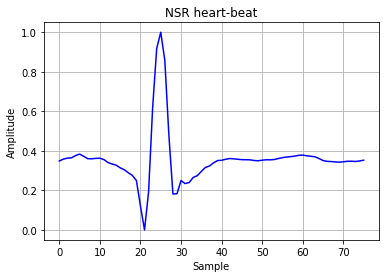

In [15]:
plt.plot(data['0'],c='b')
plt.title('NSR heart-beat')
plt.grid('--')
plt.ylabel('Amplitude')
plt.xlabel('Sample')
plt.show()

In [55]:
# DWT提取模板心拍
x_pattern = []
x_num = []
x_map = {}
y_pattern = []
# scd_indexs
for index in ['30']:
    # 读取分割的心拍
    heart_beat = pd.read_csv(ecg_info_save_path+index+'_heartbeat_chan0.csv')
    for i in range(heart_beat.shape[1]-1):
        data = np.asarray(heart_beat[str(i)],dtype=np.float32)
        # 第一个模板
        if len(x_pattern)==0:
            x_pattern.append(data)
            x_num.append(1)
            x_map[i] = 0
        else:
            # 计算当前心拍到各个模板的DTW距离
            min_dist = data.shape[0]
            min_idx = -1
            for idx,t in enumerate(x_pattern):
                dist,path = fastdtw(t,data,dist=euclidean)
                if dist<min_dist:
                    min_dist = dist
                    min_idx = idx
            # 根据距离阈值判断是否加入模板或者创建新模板
            if(min_dist<0.5):
                x_pattern[min_idx] = (x_pattern[min_idx]*x_num[min_idx]+data)/(x_num[min_idx]+1)
                x_num[min_idx] += 1
                x_map[i] = min_idx
                print("{0} is {1}".format(i,min_idx))
            else:
                x_pattern.append(data)
                x_num.append(1)
                x_map[i] = x_num[-1]
                print("{0} is new".format(i))
        print("==============")
'''
for index in nsr_indexs:
    heart_beat = pd.read_csv(ecg_info_save_path+index+'_heartbeat_chan0.csv')
    temp,nums,temp_map = beat_template_extraction(heart_beat,threshold=0.3)
    temp = temp[np.where(nums>50)]
    for t in temp:
        x_pattern.append(np.asarray(t[:75],dtype=np.float32))
        y_pattern.append(0)
x_pattern = np.asarray(x_pattern,dtype=np.float32)
y_pattern = np.asarray(y_pattern,dtype=np.float32)
'''

1 is new
2 is new
3 is new
4 is new
5 is new
6 is 3
7 is new
8 is 1
9 is 2
10 is 6
11 is 3
12 is 3
13 is 1
14 is 0
15 is 1
16 is new
17 is 1
18 is 0
19 is 1
20 is 6
21 is 3
22 is 6
23 is 6
24 is 1
25 is 1
26 is 4
27 is 4
28 is 1
29 is 1
30 is 0
31 is 1
32 is new
33 is 6
34 is 1
35 is 1
36 is 1
37 is 6
38 is 1
39 is new
40 is new
41 is 10
42 is 9
43 is 4
44 is 1
45 is 2
46 is new
47 is 6
48 is 1
49 is 6
50 is 0
51 is 5
52 is new
53 is new
54 is 0
55 is 6
56 is new
57 is 9
58 is 6
59 is 0
60 is 1
61 is 1
62 is 2
63 is 10
64 is 4
65 is 4
66 is new
67 is 1
68 is 2
69 is 5
70 is 4
71 is new
72 is 10
73 is 1
74 is 3
75 is 9
76 is 1
77 is 1
78 is new
79 is 1
80 is 9
81 is 4
82 is 1
83 is 4
84 is 9
85 is 1
86 is 1
87 is 4
88 is 9
89 is 4
90 is 1
91 is 1
92 is 11
93 is 10


KeyboardInterrupt: 

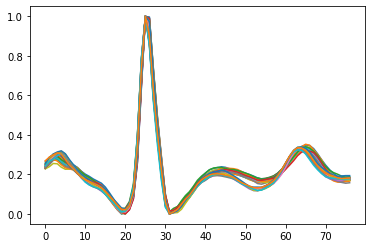

In [52]:
for i in range(len(x_pattern)):
    if(x_num[i]>2):
        plt.plot(x_pattern[i])

[534   1   1   1   1   1   1   1   1   1   1   1   1   1  59   1   1   1
   1   1   1   5   4   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1  32   1   1   1   1   1   1]
593


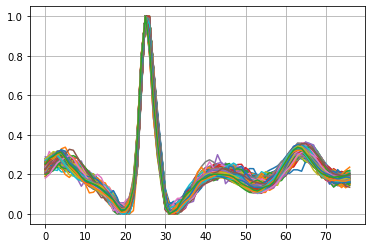

In [6]:
for index in ['30']:
    heart_beat = pd.read_csv(ecg_info_save_path+index+'_heartbeat_chan0.csv')
    temp,nums,temp_map = beat_template_extraction(heart_beat,threshold=0.3)
    print(nums)
    count=0
    #plt.figure(1,(16,8))
    plt.grid('::')
    for i in range(heart_beat.shape[1]-1):
        if nums[temp_map[str(i)]]>50:
            count+=1
            plt.plot(heart_beat[str(i)])
    print(count)

    plt.show()

In [67]:
# shapelets 数据集制作
# 独立心拍
dataset = []
labels = []
for index in scd_indexs:
    heart_beat = pd.read_csv(ecg_info_save_path+index+'_heartbeat_chan0.csv')
    temp,nums,temp_map = beat_template_extraction(heart_beat,threshold=0.5)
    for i in range(heart_beat.shape[1]-1):
        if nums[temp_map[str(i)]]>30:
            dataset.append(np.asarray(heart_beat[str(i)][:75],dtype=np.float32))
            labels.append(1)
for index in nsr_indexs:
    heart_beat = pd.read_csv(ecg_info_save_path+index+'_heartbeat_chan0.csv')
    temp,nums,temp_map = beat_template_extraction(heart_beat,threshold=0.5)
    for i in range(heart_beat.shape[1]-1):
        if nums[temp_map[str(i)]]>30:
            dataset.append(np.asarray(heart_beat[str(i)][:75],dtype=np.float32))
            labels.append(0)
dataset = np.asarray(dataset,dtype=np.float32)
labels = np.asarray(labels,dtype=np.int32)

In [202]:
# 包含异常心拍的训练集
dataset = np.empty((0,75),dtype=object)
labels = []
for index in scd_indexs:
    heart_beat = pd.read_csv(ecg_info_save_path+index+'_heartbeat_chan0.csv')
    heart_beat = heart_beat[:75]
    dataset = np.append(dataset,np.asarray(heart_beat.T[1:]),axis=0)
    labels.extend([1]*(heart_beat.shape[1]-1))
for index in nsr_indexs:
    heart_beat = pd.read_csv(ecg_info_save_path+index+'_heartbeat_chan0.csv')
    heart_beat = heart_beat[:75]
    dataset = np.append(dataset,np.asarray(heart_beat.T[1:]),axis=0)
    labels.extend([0]*(heart_beat.shape[1]-1))
labels = np.asarray(labels,dtype=np.int16)

In [150]:
# shapelets 数据集制作
# 模板心拍
x_pattern = []
y_pattern = []
for index in scd_indexs:
    heart_beat = pd.read_csv(ecg_info_save_path+index+'_heartbeat_chan0.csv')
    temp,nums,temp_map = beat_template_extraction(heart_beat,threshold=0.5)
    temp = temp[np.where(nums>30)]
    for t in temp:
        x_pattern.append(np.asarray(t[:75],dtype=np.float32))
        y_pattern.append(1)
for index in nsr_indexs:
    heart_beat = pd.read_csv(ecg_info_save_path+index+'_heartbeat_chan0.csv')
    temp,nums,temp_map = beat_template_extraction(heart_beat,threshold=0.5)
    temp = temp[np.where(nums>30)]
    for t in temp:
        x_pattern.append(np.asarray(t[:75],dtype=np.float32))
        y_pattern.append(0)
x_pattern = np.asarray(x_pattern,dtype=np.float32)
y_pattern = np.asarray(y_pattern,dtype=np.float32)

KeyboardInterrupt: 

In [52]:
nums

array([147, 317, 326, 130,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1])

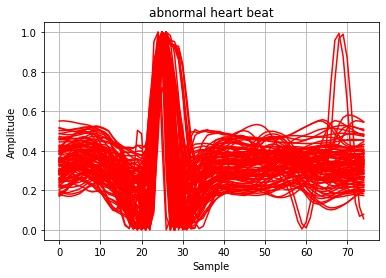

In [55]:
for idx,x in enumerate(x_pattern):
    plt.plot(x,c='r')
    plt.title('abnormal heart beat')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.grid('--')
plt.show()

In [ ]:
# 心拍检查
for index in nsr_indexs:
    heart_beat = pd.read_csv(ecg_info_save_path+index+'_heartbeat_chan0.csv')
    print(heart_beat.shape)
    temp,nums,temp_map = beat_template_extraction(heart_beat,threshold=1)
    plt.title(index)
    temp = temp[np.where(nums>50)]
    print(temp.shape)
    for idx,t in enumerate(temp):
        if nums[idx]>50:
            plt.plot(t)
    plt.show()

/root/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/root/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/root/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or nda

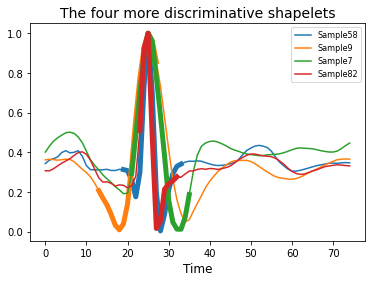

In [56]:
st = ShapeletTransform(n_shapelets=10,window_sizes=[5,8,10,15],random_state=42,sort=True) # set parameter of shapelets
x_new = st.fit_transform(x_pattern, y_pattern) # 拟合数据并进行预测
plt.figure(figsize=(6,4)) 
for i, index in enumerate(st.indices_[:4]):
    idx,start,end = index
    plt.plot(x_pattern[idx], color='C{}'.format(i), label='Sample{}'.format(idx))
    plt.plot(np.arange(start, end), x_pattern[idx, start:end], lw = 5, color='C{}'.format(i))
plt.xlabel('Time',fontsize=12)
plt.title('The four more discriminative shapelets',fontsize=14)
plt.legend(loc='best',fontsize=8)
plt.show()

In [16]:
import joblib

In [30]:
a = joblib.load('st1.pkl')

In [29]:
joblib.dump(st,'st1.pkl')

['st1.pkl']

In [20]:
# st = ShapeletTransform(n_shapelets=4,window_sizes=[10,20,30,40],random_state=42,sort=True)
# 得到新的shapelet特征
##############################################################################################################
# st classifier 
##############################################################################################################
## shapelets_        :   经过排序后的shapelet数组
## indices_           :   [idx, start, end] : 每个shapelet对应在第idx个序列，从start开始，到end结束（不包含end）
## scores_           :   与每个shapelet相关的分数，根据 'criterion' 不同，可以是互信息也可以是F-score
## window_range_    :   当window_sizes = 'auto' 时记录每个shapelet的窗口大小
##############################################################################################################

array([0.55275243, 0.54651607, 0.54474337, 0.53985618])

In [126]:
# 导入各种分类器
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

In [34]:
dataset.shape

(21280, 10)

In [55]:
index,start,end = st.indices_[0]

In [56]:
indexdd

13

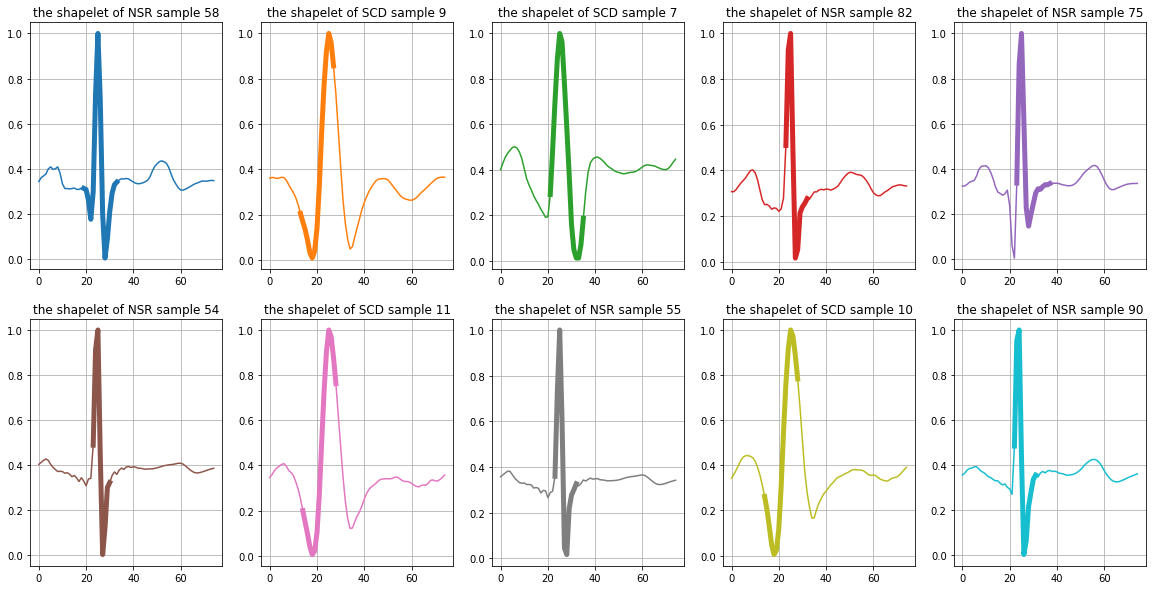

In [65]:
plt.figure(1,(20,10))
for i, index in enumerate(st.indices_[:10]):
    idx,start,end = index
    ax = plt.subplot(2,5,i+1)
    if y_pattern[idx]==0:
        ax.set_title('the shapelet of NSR sample {}'.format(idx))
    else:
        ax.set_title('the shapelet of SCD sample {}'.format(idx))
    ax.plot(x_pattern[idx], color='C{}'.format(i), label='Sample{}'.format(idx))
    ax.plot(np.arange(start, end), x_pattern[idx, start:end], lw = 5, color='C{}'.format(i))
    # ax.set_xlabel('Sample')
    # ax.set_ylabel('Amplitude')
    ax.grid('--')
plt.show()


In [203]:
new_dataset = st.transform(dataset)
x_train,x_test,y_train,y_test = train_test_split(new_dataset,labels,random_state=666)

In [204]:
clf = DecisionTreeClassifier()

In [103]:
from sklearn import tree
dot_data = tree.export_graphviz(clf
                                , feature_names=[1,2,3,4,5,6,7,8,9,10]
                                , class_names=["NSR" , "SCD" ]
                                , filled=True
                                , rounded=True
                                )
graph = graphviz.Source(dot_data)
graph.view()

NameError: name 'graphviz' is not defined

In [119]:
clf =DecisionTreeClassifier(max_depth=2,min_samples_leaf=10,max_leaf_nodes=20)

In [309]:
clf = KNeighborsClassifier(n_neighbors=15)

In [240]:
clf = LogisticRegression(penalty='l1',solver='liblinear')

In [271]:
# 根据学习曲线调参
score = []
for depth in range(10,100,10):
    clf =DecisionTreeClassifier(max_depth=13,min_samples_leaf=10,max_leaf_nodes=depth)
    clf.fit(x_train,y_train)
    score.append(clf.score(x_test,y_test))
    print(score[-1])
    print("=================")


0.9795592925485648
0.9856480139170775
0.9895621919396926
0.9907219483908379
0.9911568570600174
0.9905769788344447
0.9904320092780516
0.9904320092780516
0.9905769788344447


In [278]:
clf =DecisionTreeClassifier(max_depth=13,min_samples_leaf=10,max_leaf_nodes=50,criterion='gini')

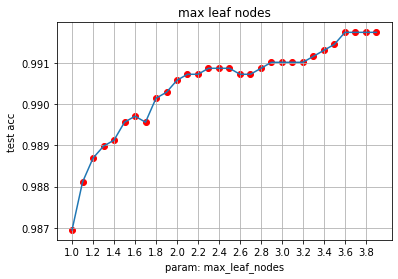

In [289]:
plt.plot(1+0.1*np.arange(30),score)
plt.title('max leaf nodes')
plt.ylabel('test acc')
plt.xlabel('param: max_leaf_nodes')
for i in range(30):
    plt.scatter(1+i*0.1,score[int(i)],c='r')
plt.xticks(1+0.2 *np.arange(15))
plt.grid('--')


In [288]:
# 根据学习曲线调参
score = []
for i in range(30):
    clf =SVC()
    clf.fit(x_train,y_train)
    score.append(clf.score(x_test,y_test))
    print(score[-1])
    print("=================")

0.9869527399246159
0.988112496375761
0.9886923746013337
0.98898231371412
0.9891272832705132
0.9895621919396926
0.9897071614960858
0.9895621919396926
0.9901420701652653
0.9902870397216584
0.9905769788344447
0.9907219483908379
0.9907219483908379
0.990866917947231
0.990866917947231
0.990866917947231
0.9907219483908379
0.9907219483908379
0.990866917947231
0.9910118875036242
0.9910118875036242
0.9910118875036242
0.9910118875036242
0.9911568570600174
0.9913018266164105
0.9914467961728037
0.99173673528559
0.99173673528559
0.99173673528559
0.99173673528559


In [310]:

clf.fit(x_train,y_train)
clf.score(x_test,y_test) 

0.9895621919396926

In [311]:
pred = clf.predict(x_test)
print('TP',np.where((pred==1)&(y_test==1))[0].shape) # 预测阳 实际阳
print('TN',np.where((pred==0)&(y_test==0))[0].shape) # 预测阴 实际阴
print('FP',np.where((pred==1)&(y_test==0))[0].shape) # 预测阳 实际阴
print('FN',np.where((pred==0)&(y_test==1))[0].shape) # 预测阴 实际阳

TP (3329,)
TN (3497,)
FP (5,)
FN (67,)


In [229]:
y_test.shape

(6898,)

In [345]:
3497/3502

0.9985722444317533

In [344]:
3329/(3396)

0.9802709069493521

In [343]:
(3329+3497)/6898

0.9895621919396926

In [228]:
np.where(y_test==1)[0].shape

(3396,)

In [226]:
random_forest = RandomForestClassifier(random_state=0)
random_forest.fit(x_train,y_train)
print(random_forest.score(x_test,y_test))


0.9940562481878805


In [224]:
# 逻辑回归作为基分类器
ada_boost = AdaBoostClassifier(LogisticRegression(),n_estimators=1000,random_state=666)
ada_boost.fit(x_train,y_train)
print(ada_boost.score(x_test,y_test))

0.9427370252247028


In [69]:
# 决策树作为基分类器
ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2,min_samples_leaf=10,max_leaf_nodes=20),n_estimators=1000,random_state=666)
ada_boost.fit(x_train,y_train)
print(ada_boost.score(x_test,y_test))

0.9990302246646193


In [225]:
# 支持向量机作为基分类器
ada_boost = AdaBoostClassifier(SVC(),n_estimators=1000,algorithm='SAMME',random_state=666)
ada_boost.fit(x_train,y_train)
print(ada_boost.score(x_test,y_test))

0.5076833864888374


In [98]:
a = ada_boost.staged_score(x_test,y_test)

In [111]:
print(ada_boost.score(x_train,y_train))

0.9404569457915724


In [23]:
joblib.dump(ada_boost,'ada_boost.pkl') 

['ada_boost.pkl']

In [24]:
import wfdb
from neurokit import ecg_preprocess
new_nsr_dataset = "../Dataset/MIT-MITDB/"
record = wfdb.rdrecord(new_nsr_dataset+'103',physical=False,channels=[0,1])
signal = -record.d_signal[:,0]
fs = record.fs
ecg_info = ecg_preprocess(signal,fs)

/root/anaconda3/envs/py36/lib/python3.6/site-packages/neurokit/bio/bio_ecg_preprocessing.py:177: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  heartbeats.index = pd.date_range(pd.datetime.today(), periods=len(heartbeats), freq=str(int(1000000/sampling_rate)) + "us")


In [66]:
# 处理MITDB的数据
import wfdb
from neurokit import ecg_preprocess
new_nsr_dataset = "../Dataset/MIT-MITDB/"
record = wfdb.rdrecord(new_nsr_dataset+'100',physical=False,channels=[0,1])
signal = -record.d_signal[:,0]
fs = record.fs
ecg_info = ecg_preprocess(signal,fs)

/root/anaconda3/envs/py36/lib/python3.6/site-packages/neurokit/bio/bio_ecg_preprocessing.py:177: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  heartbeats.index = pd.date_range(pd.datetime.today(), periods=len(heartbeats), freq=str(int(1000000/sampling_rate)) + "us")


In [ ]:
ecg_info['ECG']['R_Peaks']

In [74]:
rpeaks.shape

NameError: name 'rpeaks' is not defined

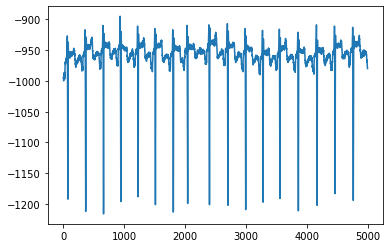

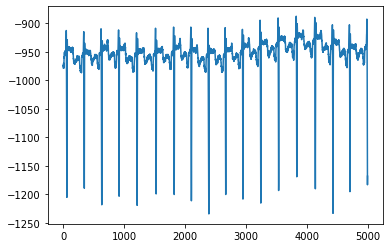

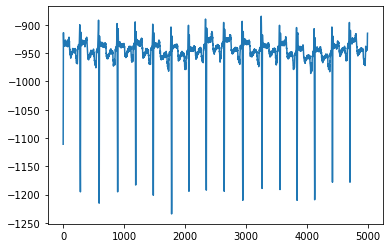

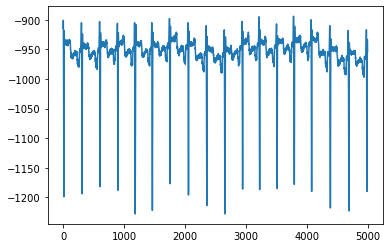

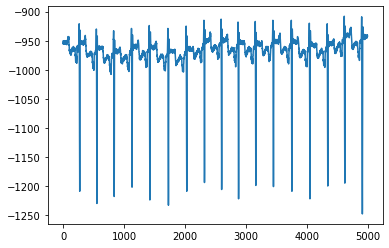

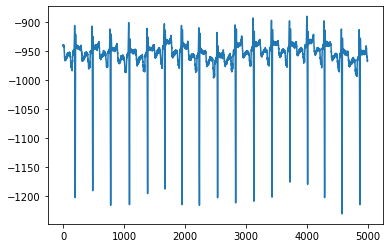

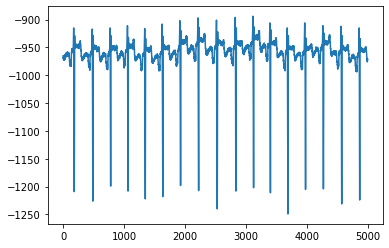

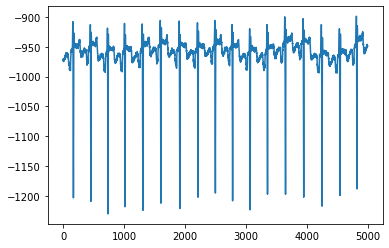

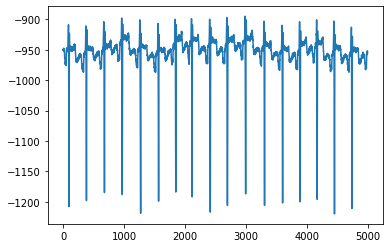

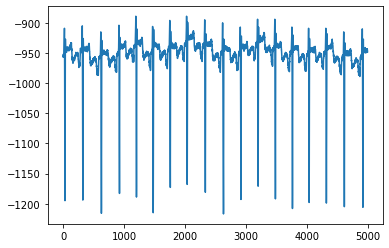

In [67]:
# 检查数据
length = 5000
for i in range(10):
    plt.plot(signal[i*length:(i+1)*length])
    
    plt.scatter()
    plt.show()

In [25]:
a = ecg_info['ECG']['Cardiac_Cycles'].resample(str(1000000/125)+'U',closed='left').mean()
for i in range(a.shape[1]):
    a[i] = (np.max(a[i])-a[i])/(np.max(a[i])-np.min(a[i]))
test = np.asarray(a).T

In [26]:
feature = st.transform(test)
pred = ada_boost.predict(feature)
err = np.where(pred==1)[0]
print(err)
print(1-len(err)/len(pred))

[1342 1346 1400]
0.9985583853916387


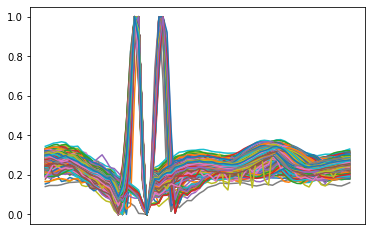

In [27]:
plt.xticks([])
for i in range(a.shape[1]):
    plt.plot(a[i])
plt.show()

In [28]:
sample = st.indices_.T[0]

In [32]:
y_test.shape

(5320,)

In [30]:
y_pattern[sample]

array([1., 0., 0., 1., 1., 1., 1., 1., 0., 1.], dtype=float32)

(array([159, 206, 207, 360, 361, 362, 900]),)

In [16]:
temp,nums,temp_map = beat_template_extraction(a,threshold=1)
plt.title(index)
temp = temp[np.where(nums>50)]
print(temp.shape)
for idx,t in enumerate(temp):
    if nums[idx]>50:
        plt.plot(t)
plt.show()

KeyError: '0'

In [35]:
pred

[array([0], dtype=int32),
 array([0], dtype=int32),
 array([0], dtype=int32),
 array([0], dtype=int32),
 array([0], dtype=int32),
 array([0], dtype=int32),
 array([0], dtype=int32),
 array([0], dtype=int32),
 array([0], dtype=int32),
 array([0], dtype=int32)]

In [52]:
ada_boost.predict(x_test[:10])

array([1, 1, 0, 0, 1, 0, 1, 0, 0, 0], dtype=int32)

In [53]:
y_test[:10]

array([1, 1, 0, 0, 1, 0, 1, 0, 0, 0], dtype=int32)

In [21]:
st.

(143, 4)

In [ ]:
clf = LearningShapelets(n_shapelets_per_size={20:4,30:4,40:4},max_iter=1)
clf.fit(x_train,y_train)
clf.predict(x_train)
shapelets = np.asarray(clf.get_weights("shapelets_0_0")[0])
position = clf.locate(x_train)
for i,d in enumerate(x_train):
    for j in range(4):
        plt.plot(shapelets[j],c='r')
        plt.plot(d[position[i][j]:position[i][j]+4])
    plt.show()

In [ ]:
train_data = []
train_label = []
scd_indexs = ['30','31','32','33','34','35','36','38','41','43','44','45','46','47','48','50','51','52']
nsr_indexs = ['16265','16272','16273','16420','16483','16539','16773','16786','16795','17052','17453','18177','18184','19088','19090','19093','19140','19830']
path = '../Dataset/ecg_info/'
date_index1 = pd.date_range('2021-1-1 0:0:0',periods=150000,freq='4000U')
date_index2 = pd.date_range('2021-1-1 0:0:0',periods=76800,freq='7812.5U')
for index in scd_indexs:
    ecg = pd.read_csv(path+index+'_ecg_chan0.csv')
    # 为ECG添加DateTimeIndex
    ecg['index']=date_index1
    ecg = ecg.set_index('index')
    # 重采样为125Hz
    train_data.append(np.asarray(ecg['ECG_Filtered'].resample('8000U').mean()))
    train_label.append(1)
for index in nsr_indexs:
    ecg = pd.read_csv(path+index+'_ecg_chan0.csv')
    ecg['index']=date_index2
    ecg = ecg.set_index('index')
    train_data.append(np.asarray(ecg['ECG_Filtered'].resample('8000U').mean()))
    train_label.append(-1)
train_data = np.asarray(train_data)
train_label =np.asarray(train_label)